## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
print(len(X))

100


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>

1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

## Task: 1 Logistic Regression

### 1. Finding the Correlation between the features
    

#### a. check the correlation between the features

In [5]:
d = data.drop(['target','w'], axis=1)

In [6]:
cor = d.corr()
cor

,x,y,z,x*x,2*y,2*z+3*x*x
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000


#### b. plot heat map of correlation matrix using seaborn heatmap

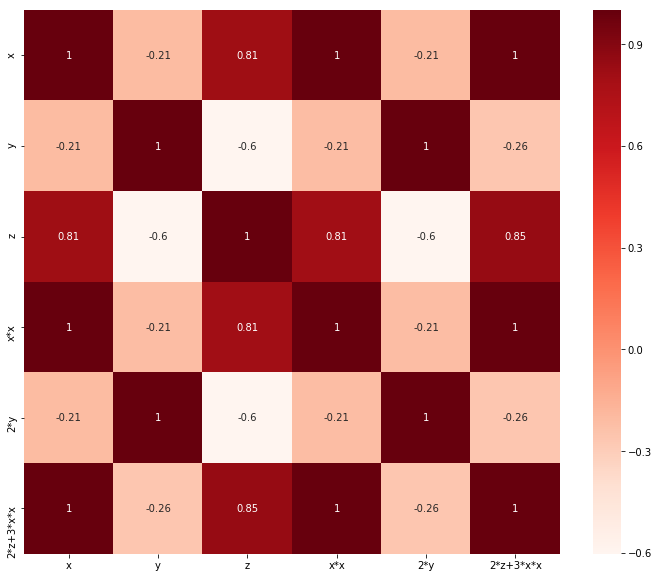

In [7]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
plt.figure(figsize=(12,10))
cor = d.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2. Finding the best model for the given data

#### a. Train Logistic regression on data(X,Y) that we have created in the above cell

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [9]:
from sklearn.model_selection import GridSearchCV


gsc = GridSearchCV(estimator = LogisticRegression(),param_grid={
            'C': [0.0001,0.001,0.1,1,10,100]})
gsc.fit(X,Y)

best_C = gsc.best_params_
print("Best value for hyperpaerameter C = ",best_C)

Best value for hyperpaerameter C =  {'C': 0.0001}


#### c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [10]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### 3. Getting the weights with the original data

#### a. train the 'best_model' with X, Y

In [11]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### b. Check the accuracy of the model 'best_model_accuracy'

In [12]:
# To find accuracy of the best_model the data is divided into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, stratify=Y)

In [13]:
best_model = LogisticRegression(C = 0.0001)
best_model.fit(X_train,y_train)
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy = a/len(y_test)
print("The accuracy of the best_model = ",best_model_accuracy)

The accuracy of the best_model =  1.0


#### c. Get the weights W using best_model.coef_

In [14]:
best_w = best_model.coef_
print(best_w)

[[ 0.0032228  -0.00297691  0.0042705   0.00316198 -0.00297691  0.0033614
   0.00274008]]


### 4. Modifying original data

### a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [15]:
# Adding a noise of order 10^-2 to each element of X 
noise = 0.01
X_ = X
for i in X_:
    for j in range(len(i)):
        i[j] = i[j] + noise

#### b. Train the same 'best_model' with data (X', Y)

In [16]:
best_model.fit(X_,Y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### c. Check the accuracy of the model 'best_model_accuracy_edited'

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.10, stratify=Y)

In [18]:
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy_edited = a/len(y_test)
print("The accuracy of the edited best_model = ",best_model_accuracy_edited)

The accuracy of the edited best_model =  1.0


#### d. Get the weights W' using best_model.coef_

In [26]:
best_w_edited = best_model.coef_
print(best_w_edited)

[[ 0.00359629 -0.00341974  0.00479981  0.00355268 -0.00341974  0.00377694
   0.00316971]]


### 5.  Checking deviations in metric and weights

#### a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [20]:
difference_between_accuracy = best_model_accuracy_edited - best_model_accuracy
print(difference_between_accuracy)

0.0


#### b. find the absolute change between each value of W and W' ==> |(W-W')|

In [40]:
difference_between_w = np.absolute(best_w - best_w_edited)
print(difference_between_w)

# converting into list
difference_between_w_list = []
for i in difference_between_w[0]:
    difference_between_w_list.append(i)
print(difference_between_w_list)

[[0.00037349 0.00044283 0.00052931 0.00039071 0.00044283 0.00041554
  0.00042963]]
[0.0003734878239709475, 0.00044282932785529635, 0.0005293051880613381, 0.000390705664662731, 0.00044282932785529635, 0.0004155429405460864, 0.0004296265386969523]


#### c. print the top 4 features which have higher % change in weights compare to the other 

In [41]:
colum = []
for col in data.columns: 
    if col != 'target':
        colum.append(col)

In [42]:
keys  = colum
values = difference_between_w_list
dictionary = dict(zip(keys,values))
print(dictionary)

{'x': 0.0003734878239709475, 'y': 0.00044282932785529635, 'z': 0.0005293051880613381, 'x*x': 0.000390705664662731, '2*y': 0.00044282932785529635, '2*z+3*x*x': 0.0004155429405460864, 'w': 0.0004296265386969523}


In [56]:
#sorting of dictionry : https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
sort_dict = sorted(dictionary.items(), key=lambda item: item[1],reverse= True)[:4]
print("top 4 features which have higher % change in weights:")
for i in sort_dict:
    print(i)

top 4 features which have higher % change in weights:
('z', 0.0005293051880613381)
('y', 0.00044282932785529635)
('2*y', 0.00044282932785529635)
('w', 0.0004296265386969523)


## Task 2: Linear SVM

### 2. Finding the best model for the given data

#### a. Train Linear SVM on data(X,Y) that we have created in the above cell

In [57]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or random search CV make sure you choose the alpha in log space)

In [58]:
from sklearn.model_selection import GridSearchCV


gsc = GridSearchCV(estimator = SVC(kernel = 'linear'),param_grid={
            'C': [0.0001,0.001,0.1,1,10,100]})
gsc.fit(X,Y)

best_C = gsc.best_params_
print("Best value for hyperpaerameter C = ",best_C)

Best value for hyperpaerameter C =  {'C': 0.1}


#### c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [59]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 3. Getting the weights with the original data

#### a. train the 'best_model' with X, Y

In [60]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### b. Check the accuracy of the model 'best_model_accuracy'

In [61]:
# To find accuracy of the best_model the data is divided into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, stratify=Y)

In [62]:
best_model = SVC(kernel = 'linear',C = 0.1)
best_model.fit(X_train,y_train)
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy = a/len(y_test)
print("The accuracy of the best_model = ",best_model_accuracy)

The accuracy of the best_model =  1.0


#### c. Get the weights W using best_model.coef_

In [63]:
best_w = best_model.coef_
print(best_w)

[[ 0.20610805 -0.29447692  0.66719643  0.18621623 -0.29447692  0.2481484
   0.09723715]]


### 4. Modifying original data

#### a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)

In [64]:
noise = 0.01
X_ = X
for i in X_:
    for j in range(len(i)):
        i[j] = i[j] + noise

#### b. Train the same 'best_model' with data (X', Y)

In [65]:
best_model.fit(X_,Y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### c. Check the accuracy of the model 'best_model_accuracy_edited'

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size=0.10, stratify=Y)

In [67]:
f = best_model.predict(X_test)

# Finding model best accuracy
a = 0
for i in range(len(y_test)):
    if f[i] == y_test[i]:
        a = a + 1
best_model_accuracy_edited = a/len(y_test)
print("The accuracy of the edited best_model = ",best_model_accuracy_edited)

The accuracy of the edited best_model =  1.0


#### d. Get the weights W' using best_model.coef_

In [68]:
best_w_edited = best_model.coef_
print(best_w_edited)

[[ 0.20595134 -0.29522977  0.66738522  0.18607665 -0.29522977  0.24804557
   0.09666126]]


### 5.  Checking deviations in metric and weights

### a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'

In [69]:
difference_between_accuracy = best_model_accuracy_edited - best_model_accuracy
print(difference_between_accuracy)

0.0


#### b. find the absolute change between each value of W and W' ==> |(W-W')|

In [71]:
difference_between_w = np.absolute(best_w - best_w_edited)
print(difference_between_w_list)

[0.0003734878239709475, 0.00044282932785529635, 0.0005293051880613381, 0.000390705664662731, 0.00044282932785529635, 0.0004155429405460864, 0.0004296265386969523]


#### c. print the top 4 features which have higher % change in weights compare to the other 

In [72]:
colum = []
for col in data.columns: 
    if col != 'target':
        colum.append(col)

In [73]:
keys  = colum
values = difference_between_w_list
dictionary = dict(zip(keys,values))
print(dictionary)

{'x': 0.0003734878239709475, 'y': 0.00044282932785529635, 'z': 0.0005293051880613381, 'x*x': 0.000390705664662731, '2*y': 0.00044282932785529635, '2*z+3*x*x': 0.0004155429405460864, 'w': 0.0004296265386969523}


In [74]:
#sorting of dictionry : https://www.saltycrane.com/blog/2007/09/how-to-sort-python-dictionary-by-keys/
sort_dict = sorted(dictionary.items(), key=lambda item: item[1],reverse= True)[:4]
print("top 4 features which have higher % change in weights:")
for i in sort_dict:
    print(i)

top 4 features which have higher % change in weights:
('z', 0.0005293051880613381)
('y', 0.00044282932785529635)
('2*y', 0.00044282932785529635)
('w', 0.0004296265386969523)
